# Data Exploration - Ambient Sound Classification

**Project B: Ambient Sound Classification**

**Goal**: Explore the provided training data to understand:
- Class distribution
- Audio characteristics per class
- Data quality and potential issues

**Data Provided by Professor**:
- `training_data_projectB.npy`: (240000 × 1210) - 1210 audio samples, 5 seconds @ 48kHz
- `training_labels_projectB.npy`: (1210,) - Labels 1-5 (1-indexed)

**Classes**:
1. Indoor Quiet
2. Street Traffic
3. Kitchen Activity
4. Human Chatter
5. Nature Sounds

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display

plt.style.use('bmh')
%matplotlib inline

## 1. Load Data

In [6]:
data_training = np.load('training_data_projectB.npy')
labels_training = np.load('training_labels_projectB.npy')

print(f"Data shape: {data_training.shape}")
print(f"Labels shape: {labels_training.shape}")
print(f"\nData type: {data_training.dtype}")
print(f"Labels type: {labels_training.dtype}")
print(f"\nLabel range: {labels_training.min()} to {labels_training.max()}")

Data shape: (240000, 1210)
Labels shape: (1210,)

Data type: float32
Labels type: float64

Label range: 1.0 to 5.0


In [7]:
labels_names = ['Indoor Quiet', 'Street Traffic', 'Kitchen Activity',
                'Human Chatter', 'Nature Sounds']

SAMPLE_RATE = 48000
DURATION = 5
N_SAMPLES = data_training.shape[1]
N_CLASSES = 5

## 2. Class Distribution

Check if classes are balanced or if there's class imbalance

In [8]:
label_unique, counts = np.unique(labels_training, return_counts=True)

print("Class Distribution:")
print("="*50)
for label, count in zip(label_unique, counts):
    class_name = labels_names[int(label) - 1]
    percentage = (count / N_SAMPLES) * 100
    print(f"Class {int(label)} ({class_name:20s}): {count:4d} samples ({percentage:.1f}%)")

print("="*50)
print(f"Total samples: {N_SAMPLES}")

Class Distribution:
Class 1 (Indoor Quiet        ):  245 samples (20.2%)
Class 2 (Street Traffic      ):  245 samples (20.2%)
Class 3 (Kitchen Activity    ):  250 samples (20.7%)
Class 4 (Human Chatter       ):  244 samples (20.2%)
Class 5 (Nature Sounds       ):  226 samples (18.7%)
Total samples: 1210


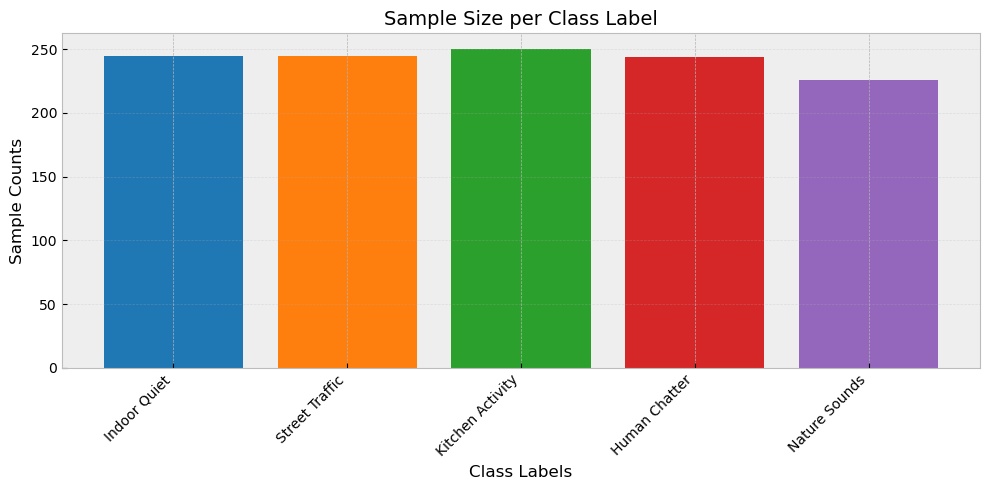

In [9]:
plt.figure(figsize=(10, 5))
plt.bar(label_unique, counts, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Sample Size per Class Label', fontsize=14)
plt.ylabel('Sample Counts', fontsize=12)
plt.xlabel('Class Labels', fontsize=12)
plt.xticks(label_unique, labels_names, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Audio Waveform Analysis

Visualize waveforms from each class to understand audio characteristics

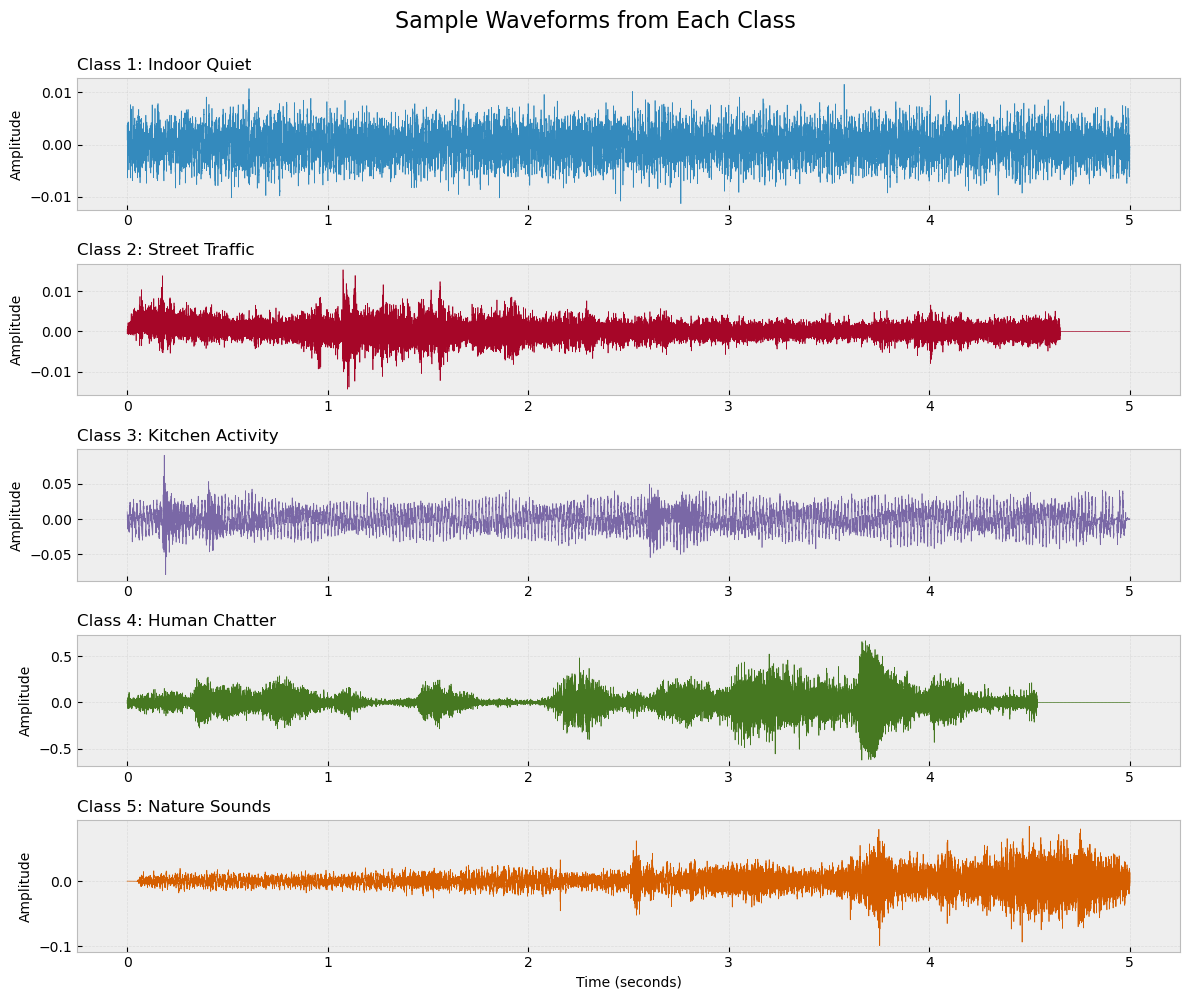

In [10]:
fig, axes = plt.subplots(5, 1, figsize=(12, 10))
fig.suptitle('Sample Waveforms from Each Class', fontsize=16, y=0.995)

for class_label in range(1, 6):
    idx = np.where(labels_training == float(class_label))[0][0]
    
    audio = data_training[:, idx]
    time = np.linspace(0, DURATION, len(audio))
    
    ax = axes[class_label - 1]
    ax.plot(time, audio, linewidth=0.5, color=f'C{class_label-1}')
    ax.set_ylabel('Amplitude', fontsize=10)
    ax.set_title(f'Class {class_label}: {labels_names[class_label - 1]}', 
                 fontsize=12, loc='left')
    ax.grid(True, alpha=0.3)
    
    if class_label == 5:
        ax.set_xlabel('Time (seconds)', fontsize=10)

plt.tight_layout()
plt.show()

## 4. Audio Statistics per Class

Compute basic statistics: mean amplitude, RMS energy, zero-crossing rate

In [11]:
def compute_basic_stats(audio):
    mean_amp = np.mean(np.abs(audio))
    rms = np.sqrt(np.mean(audio**2))
    
    zero_crossings = np.sum(np.diff(np.sign(audio)) != 0)
    zcr = zero_crossings / len(audio)
    
    return mean_amp, rms, zcr

stats_by_class = {label: {'mean_amp': [], 'rms': [], 'zcr': []} 
                  for label in range(1, 6)}

for i in range(N_SAMPLES):
    audio = data_training[:, i]
    label = int(labels_training[i])
    
    mean_amp, rms, zcr = compute_basic_stats(audio)
    
    stats_by_class[label]['mean_amp'].append(mean_amp)
    stats_by_class[label]['rms'].append(rms)
    stats_by_class[label]['zcr'].append(zcr)

print("\nClass Statistics Summary:")
print("="*80)
print(f"{'Class':<25} {'Mean Amplitude':<20} {'RMS Energy':<20} {'ZCR'}")
print("="*80)

for label in range(1, 6):
    class_name = labels_names[label - 1]
    mean_amp_avg = np.mean(stats_by_class[label]['mean_amp'])
    rms_avg = np.mean(stats_by_class[label]['rms'])
    zcr_avg = np.mean(stats_by_class[label]['zcr'])
    
    print(f"{class_name:<25} {mean_amp_avg:<20.6f} {rms_avg:<20.6f} {zcr_avg:.6f}")

print("="*80)


Class Statistics Summary:
Class                     Mean Amplitude       RMS Energy           ZCR
Indoor Quiet              0.005247             0.008449             0.049979
Street Traffic            0.059690             0.080573             0.032790
Kitchen Activity          0.019604             0.033224             0.158825
Human Chatter             0.036144             0.050335             0.039694
Nature Sounds             0.014542             0.020555             0.071795


## 5. Listen to Sample Audio from Each Class

Play one example from each class to understand audio content

In [12]:
for class_label in range(1, 6):
    idx = np.where(labels_training == float(class_label))[0][0]
    audio = data_training[:, idx]
    
    print(f"\n{'='*60}")
    print(f"Class {class_label}: {labels_names[class_label - 1]}")
    print(f"Sample index: {idx}")
    print(f"{'='*60}")
    
    display(Audio(audio, rate=SAMPLE_RATE))


Class 1: Indoor Quiet
Sample index: 12



Class 2: Street Traffic
Sample index: 14



Class 3: Kitchen Activity
Sample index: 1



Class 4: Human Chatter
Sample index: 0



Class 5: Nature Sounds
Sample index: 3


## 6. Amplitude Distribution Comparison

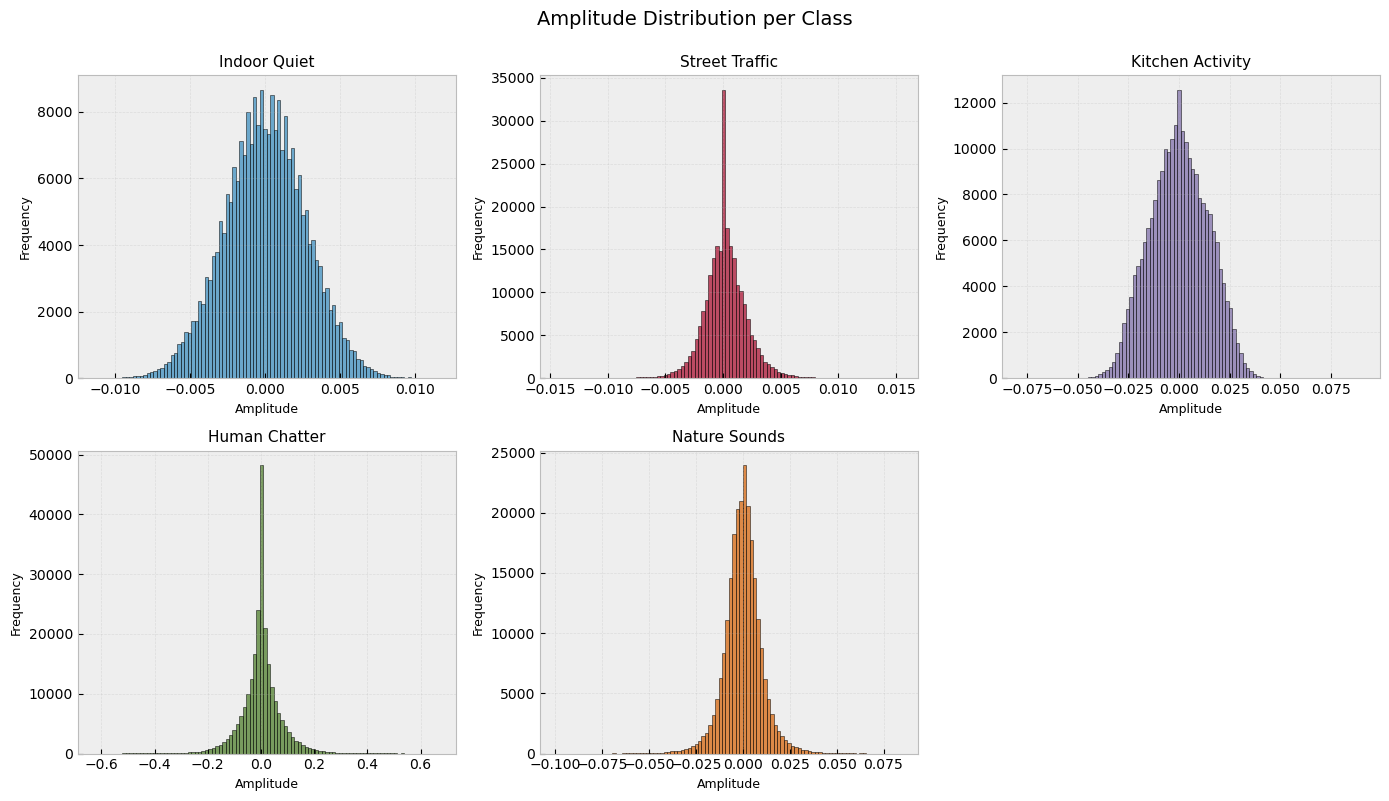

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for class_label in range(1, 6):
    idx = np.where(labels_training == float(class_label))[0][0]
    audio = data_training[:, idx]
    
    ax = axes[class_label - 1]
    ax.hist(audio, bins=100, color=f'C{class_label-1}', alpha=0.7, edgecolor='black')
    ax.set_title(f'{labels_names[class_label - 1]}', fontsize=11)
    ax.set_xlabel('Amplitude', fontsize=9)
    ax.set_ylabel('Frequency', fontsize=9)
    ax.grid(True, alpha=0.3)

axes[5].axis('off')

fig.suptitle('Amplitude Distribution per Class', fontsize=14, y=0.995)
plt.tight_layout()
plt.show()

## 7. Key Observations

**Based on analysis of 1210 training samples:**

### Observations:

#### 1. **Class Balance**: EXCELLENT
- **Indoor Quiet**: 245 samples (20.2%)
- **Street Traffic**: 245 samples (20.2%)
- **Kitchen Activity**: 250 samples (20.7%)
- **Human Chatter**: 244 samples (20.2%)
- **Nature Sounds**: 226 samples (18.7%)

**Conclusion**: Classes are nearly perfectly balanced. Stratified split recommended but no class weighting needed.

---

#### 2. **Audio Characteristics** - Clear Discriminative Patterns:

| Class | Mean Amplitude | RMS Energy | Zero-Crossing Rate | Characteristics |
|-------|----------------|------------|-------------------|-----------------|
| **Indoor Quiet** | 0.0052 | **0.0084 (LOWEST)** | 0.0500 | Very quiet background |
| **Street Traffic** | 0.0597 | **0.0806 (HIGHEST)** | 0.0328 (LOW) | Loud, low-frequency rumble |
| **Kitchen Activity** | 0.0196 | 0.0332 | **0.1588 (HIGHEST)** | Sharp, clattery sounds |
| **Human Chatter** | 0.0361 | 0.0503 | 0.0397 | Speech patterns (medium) |
| **Nature Sounds** | 0.0145 | 0.0206 | 0.0718 | Variable (birds/wind/water) |

**Key Insights**:
-  **RMS Energy** clearly separates Indoor Quiet (quietest) from Street Traffic (loudest)
-  **ZCR** distinguishes Kitchen Activity (very noisy/sharp) from Street Traffic (low/rumbling)
-  **Human Chatter vs Nature** may confuse - both have similar energy/ZCR patterns
  - Will need **spectral features** (MFCCs, spectral centroid) to separate these

---

#### 3. **Data Quality**:  GOOD
-  All samples are exactly 5 seconds @ 48kHz (240,000 samples each)
-  No obvious corrupted waveforms observed
-  Amplitude distributions look reasonable for each class
-  **Note**: Labels are stored as float (1.0, 2.0, etc.) not int - handled in code


## 8. Export Summary Statistics

In [14]:
summary = {
    'total_samples': N_SAMPLES,
    'n_classes': N_CLASSES,
    'sample_rate': SAMPLE_RATE,
    'duration': DURATION,
    'class_distribution': dict(zip([labels_names[int(l)-1] for l in label_unique], counts.tolist())),
    'class_stats': {
        labels_names[label-1]: {
            'mean_amplitude': float(np.mean(stats_by_class[label]['mean_amp'])),
            'rms_energy': float(np.mean(stats_by_class[label]['rms'])),
            'zero_crossing_rate': float(np.mean(stats_by_class[label]['zcr']))
        }
        for label in range(1, 6)
    }
}

import json
with open('data_summary.json', 'w') as f:
    json.dump(summary, f, indent=2)

print("Summary saved to data_summary.json")

Summary saved to data_summary.json
